In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [56]:
data = pd.read_csv('C:/Users/auro/Desktop/Adarsh/SolarPrediction.csv')

In [57]:
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


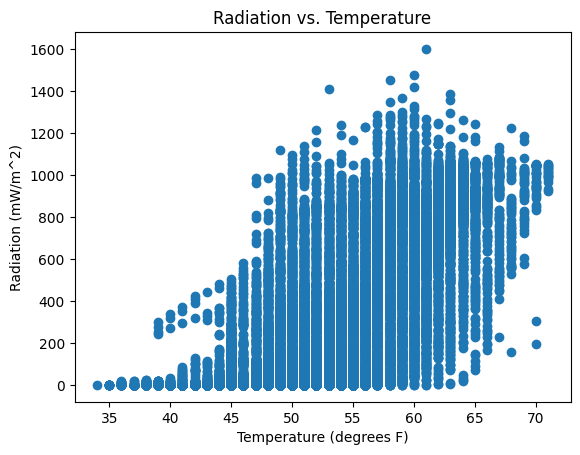

In [58]:
# Create a scatter plot of Radiation vs. Temperature
plt.scatter(data['Temperature'], data['Radiation'])

# Add axis labels and a title
plt.xlabel('Temperature (degrees F)')
plt.ylabel('Radiation (mW/m^2)')
plt.title('Radiation vs. Temperature')

# Show the plot
plt.show()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [60]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [61]:
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [62]:
data['Month'] = data['Data'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
data['Day'] = data['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\/)', x).group(0)).astype(int)
data['Year'] = data['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\s)', x).group(0)).astype(int)

data = data.drop('Data', axis=1)

In [63]:
data['Hour'] = data['Time'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
data['Minute'] = data['Time'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
data['Second'] = data['Time'].apply(lambda x: re.search(r'\d+$', x).group(0)).astype(int)

data = data.drop('Time', axis=1)

In [64]:
data['SunriseHour'] = data['TimeSunRise'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
data['SunriseMinute'] = data['TimeSunRise'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)

data['SunsetHour'] = data['TimeSunSet'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
data['SunsetMinute'] = data['TimeSunSet'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)

data = data.drop(['TimeSunRise', 'TimeSunSet'], axis=1)

In [65]:
data.dtypes

UNIXTime                    int64
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
Month                       int32
Day                         int32
Year                        int32
Hour                        int32
Minute                      int32
Second                      int32
SunriseHour                 int32
SunriseMinute               int32
SunsetHour                  int32
SunsetMinute                int32
dtype: object

In [66]:
data['Year'].unique()

array([2016])

In [67]:
data['SunriseHour'].unique()

array([6])

In [68]:
data = data.drop(['Year', 'SunriseHour'], axis=1)

In [69]:
data

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunriseMinute,SunsetHour,SunsetMinute
0,1475229326,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,13,18,13
1,1475229023,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,13,18,13
2,1475228726,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,13,18,13
3,1475228421,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,13,18,13
4,1475228124,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,1.22,44,30.43,102,145.42,6.75,12,1,0,20,4,41,17,42
32682,1480587301,1.17,44,30.42,102,117.78,6.75,12,1,0,15,1,41,17,42
32683,1480587001,1.20,44,30.42,102,145.19,9.00,12,1,0,10,1,41,17,42
32684,1480586702,1.23,44,30.42,101,164.19,7.87,12,1,0,5,2,41,17,42


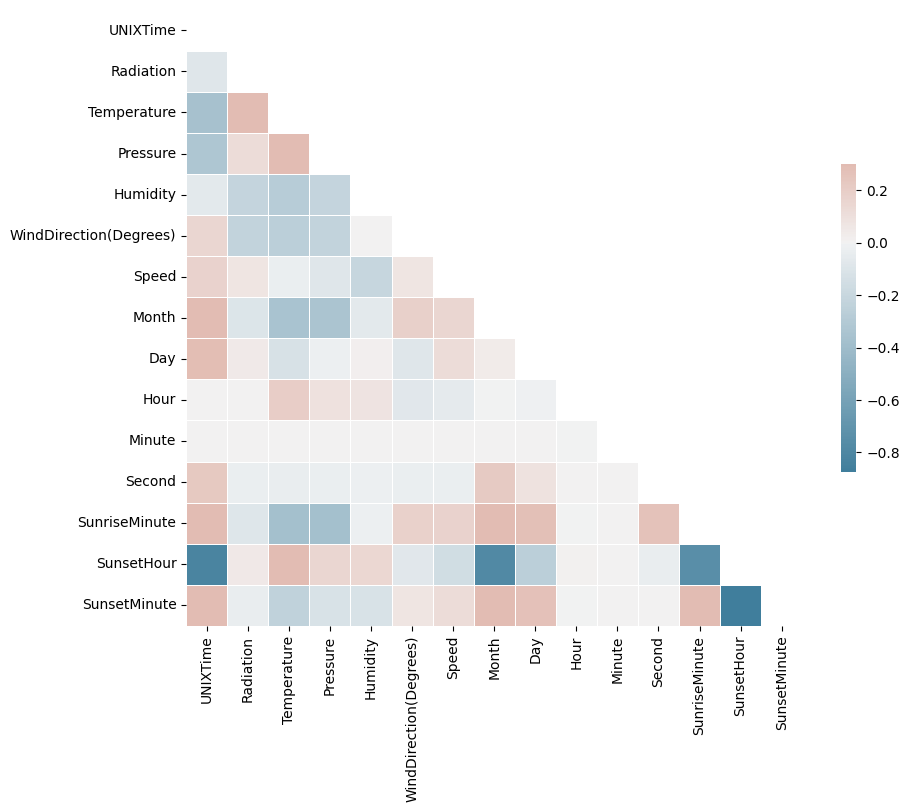

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:  {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.6}
Best Score:  2.9124581176236513
RMSE:  4.878580845527267
R^2 score:  0.7077120556338661


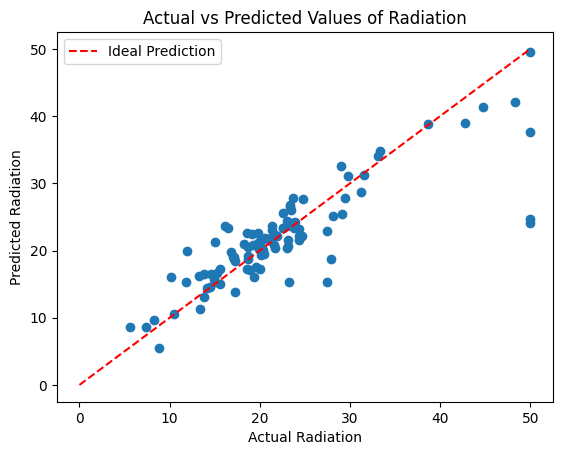

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the Boston housing dataset from OpenML
boston = fetch_openml('boston', version=1)

X = boston.data
y = boston.target

# Assume X and y are your input features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'alpha': [0.1, 0.5, 0.9],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the Gradient Boosting Regression model
gbr_model = GradientBoostingRegressor(random_state=0)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", np.sqrt(np.abs(grid_search.best_score_)))

# Train the Gradient Boosting Regression model with the best parameters
gbr_model.set_params(**grid_search.best_params_)
gbr_model.fit(X_train, y_train)

# Predict the radiation values
y_pred = gbr_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 score: ", r2)

# Plot actual vs predicted values of radiation
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Actual vs Predicted Values of Radiation")
plt.legend()
plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:  {'copy_X': True, 'fit_intercept': True}
Best Score:  nan
X_test shape: (102, 13)
X_test type: <class 'pandas.core.frame.DataFrame'>
RMSE:  5.783509315085138
R^2 score:  0.5892223849182503


C:\Users\auro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
C:\Users\auro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


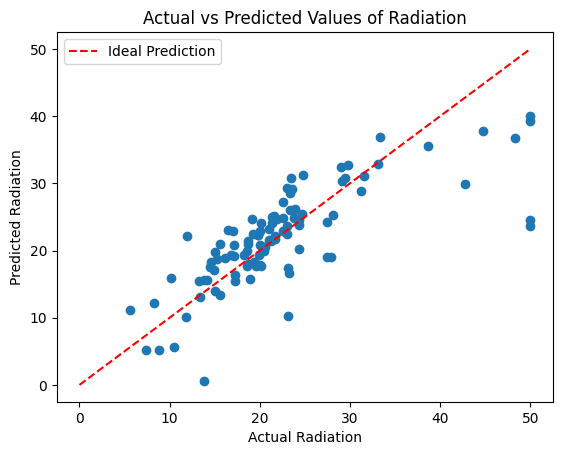

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the Boston housing dataset from OpenML
boston = fetch_openml('boston', version=1)

X = boston.data
y = boston.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", np.sqrt(np.abs(grid_search.best_score_)))

# Train the Linear Regression model with the best parameters
lr_model.set_params(**grid_search.best_params_)
lr_model.fit(X_train, y_train)

# Check the shape and type of X_test
print("X_test shape:", X_test.shape)
print("X_test type:", type(X_test))

# Convert X_test to a 2D array-like object if necessary
if len(X_test.shape) == 1:
    X_test = X_test.reshape(-1, 1)

import numpy as np

# Convert X_test to a NumPy array
X_test = np.array(X_test)

# Reshape X_test if it is a 1D array
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)

# Predict the radiation values
y_pred = lr_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 score: ", r2)

# Plot actual vs predicted values of radiation
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Actual vs Predicted Values of Radiation")
plt.legend()
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score:  4.216971635155575
RMSE:  5.684529507069897
R^2 score:  0.6031622847125393


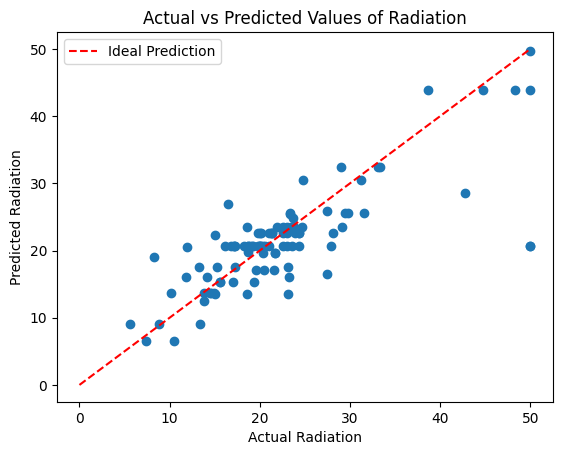

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the Boston housing dataset from OpenML
boston = fetch_openml('boston', version=1)

X = boston.data
y = boston.target

# Assume X and y are your input features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Initialize the Decision Tree Regression model
dtr_model = DecisionTreeRegressor(random_state=0)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", np.sqrt(np.abs(grid_search.best_score_)))

# Train the Decision Tree Regression model with the best parameters
dtr_model.set_params(**grid_search.best_params_)
dtr_model.fit(X_train, y_train)

# Predict the radiation values
y_pred = dtr_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 score: ", r2)

# Plot actual vs predicted values of radiation
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Actual vs Predicted Values of Radiation")
plt.legend()
plt.show()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  3.499664273908138
RMSE:  4.680364559415281
R^2 score:  0.7309808138115172


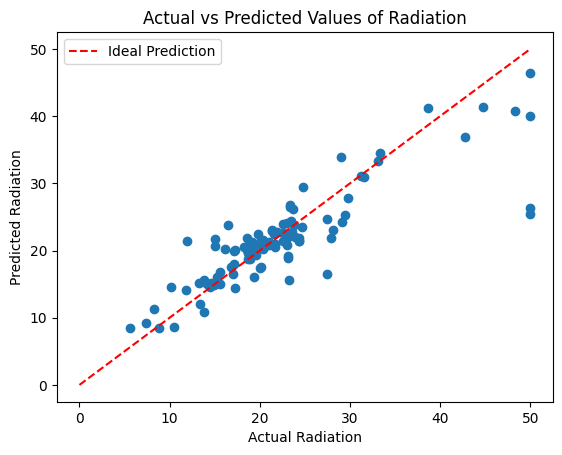

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the Boston housing dataset from OpenML
boston = fetch_openml('boston', version=1)

X = boston.data
y = boston.target

# Assume X and y are your input features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Initialize the Random Forest Regression model
rfr_model = RandomForestRegressor(random_state=0)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", np.sqrt(np.abs(grid_search.best_score_)))

# Train the Random Forest Regression model with the best parameters
rfr_model.set_params(**grid_search.best_params_)
rfr_model.fit(X_train, y_train)

# Predict the radiation values
y_pred = rfr_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 score: ", r2)

# Plot actual vs predicted values of radiation
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Actual vs Predicted Values of Radiation")
plt.legend()
plt.show()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:  {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.6}
Best Score:  3.052666199247318
RMSE:  4.364351617966267
R^2 score:  0.8119408188607684


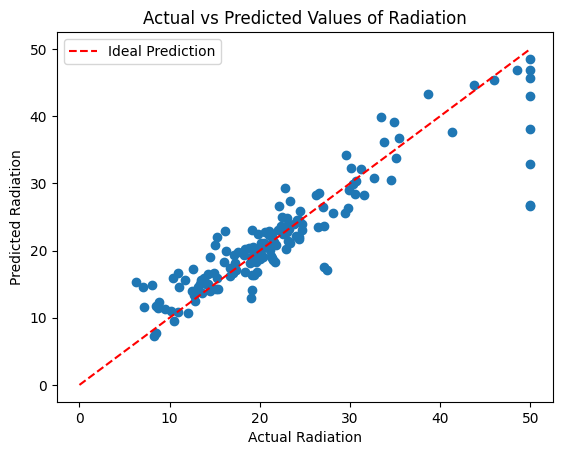

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

# Load the Boston housing dataset from OpenML
boston = fetch_openml('boston', version=1)

X = boston.data
y = boston.target

# Assume X and y are your input features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=200)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'gamma': [0.1, 0.5, 0.9],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the XGBoosting Regression model
xgb_model = XGBRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", np.sqrt(np.abs(grid_search.best_score_)))

# Train the XGBoosting Regression model with the best parameters
xgb_model.set_params(**grid_search.best_params_)
xgb_model.fit(X_train, y_train)

# Predict the radiation values
y_pred = xgb_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 score: ", r2)

# Plot actual vs predicted values of radiation
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Actual vs Predicted Values of Radiation")
plt.legend()
plt.show()

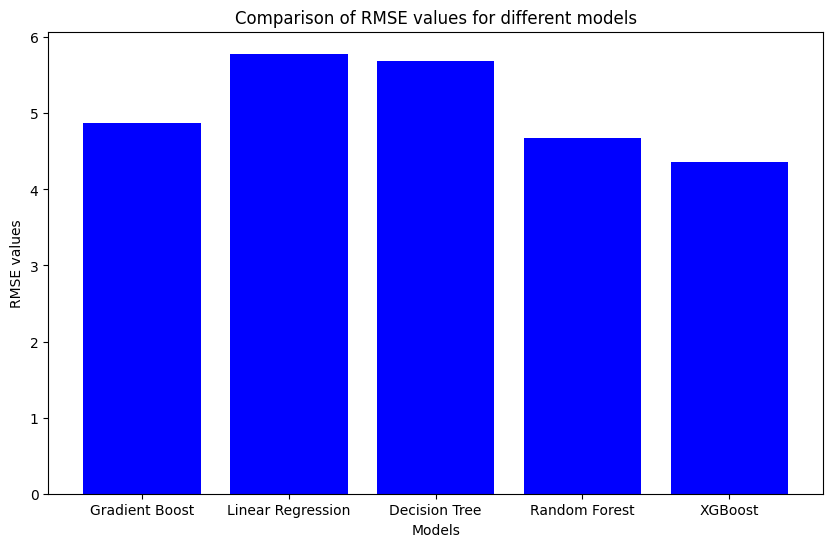

In [82]:
import matplotlib.pyplot as plt

# Define the models and their corresponding RMSE values
models = ['Gradient Boost', 'Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
rmse_values = [4.878580845527267, 5.783509315085138, 5.684529507069897, 4.680364559415281, 4.364351617966267]

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(models, rmse_values, color='blue')

# Add title and labels
plt.title('Comparison of RMSE values for different models')
plt.xlabel('Models')
plt.ylabel('RMSE values')

# Show the graph
plt.show()

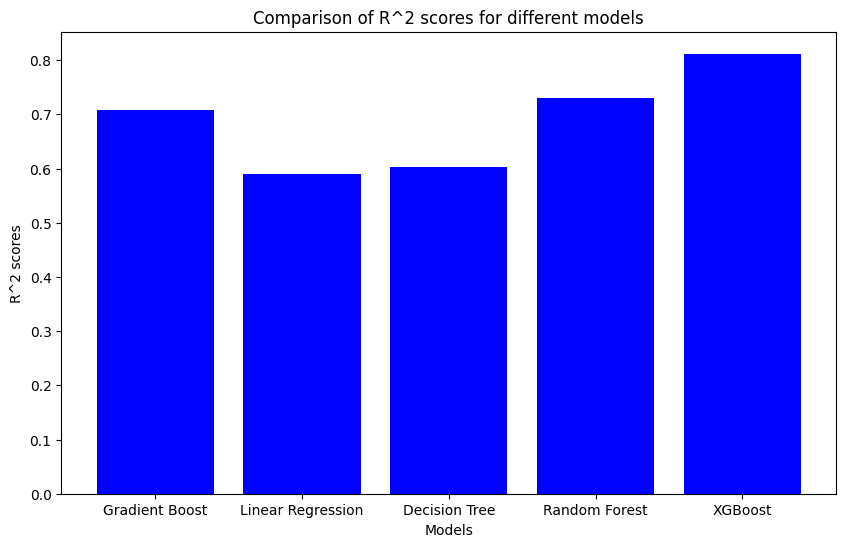

In [83]:
import matplotlib.pyplot as plt

# Define the models and their corresponding R^2 scores
models = ['Gradient Boost', 'Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
r2_scores = [0.7077120556338, 0.5892223849182503, 0.6031622847125393, 0.7309808138115172,0.8119408188607684]

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(models, r2_scores, color='blue')

# Add title and labels
plt.title('Comparison of R^2 scores for different models')
plt.xlabel('Models')
plt.ylabel('R^2 scores')

# Show the graph
plt.show()